In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from chem_tensorflow import ChemModel
from chem_tensorflow_dense import DenseGGNNChemModel
from chem_tensorflow_sparse import SparseGGNNChemModel

## Training a Dense GGNN Model

The default parameters provided for the dense GGNN Model in the authors' code are as follows:
```python
'batch_size': 256,
'graph_state_dropout_keep_prob': 1.,
'task_sample_ratios': {},
'use_edge_bias': True,
'edge_weight_dropout_keep_prob': 1
```

In [2]:
args = {
    '--help': None,
    '--config-file': None,
    '--config': '{"num_epochs": 1000}',
    '--log_dir': None,
    '--data_dir': None,
    '--restore': None,
    '--freeze-graph-model': None,
    '--evaluate': None,
    '--data_dir': None
}

model = DenseGGNNChemModel(args)
model.train()

Run 2019-04-17-17-06-02_22499 starting with following parameters:
{"num_epochs": 100, "patience": 25, "learning_rate": 0.001, "clamp_gradient_norm": 1.0, "out_layer_dropout_keep_prob": 1.0, "hidden_size": 100, "num_timesteps": 4, "use_graph": true, "tie_fwd_bkwd": true, "task_ids": [0], "random_seed": 0, "train_file": "molecules_train.json", "valid_file": "molecules_valid.json", "batch_size": 256, "graph_state_dropout_keep_prob": 1.0, "task_sample_ratios": {}, "use_edge_bias": true, "edge_weight_dropout_keep_prob": 1}
Loading data from molecules_train.json


KeyboardInterrupt: 

In [3]:
#Manual entry for log file:
desired_log = ""


# OPEN THE LOG FILE
# LOG FILE IS AN ARRAY OF DICTIONARIES
with open(model.log_file) as json_file:  
    data = json.load(json_file)
    
# with open(desired_log) as json_file:  
#    data = json.load(json_file)
    
# GET THE LOSS FROM EVERY EPOCH
training_losses = []
validation_losses = []
training_accuracy = []
validation_accuracy = []
for epoch in data:
    training_losses.append(epoch['train_results'][0])
    validation_losses.append(epoch['valid_results'][0])
    training_accuracy.append(1 - epoch['train_results'][1][0])
    validation_accuracy.append(1 - epoch['valid_results'][1][0])

NameError: name 'model' is not defined

In [ ]:
plt.plot(training_losses, 'b-', label='training')
plt.title('Taining and Validation losses')
plt.ylabel('loss')
plt.plot(validation_losses, 'r-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(training_accuracy, 'r-', label='training')
plt.title('Taining and Validation Accuracis')
plt.plot(validation_accuracy, 'b-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Training a Sparse GGNN
This time we train the Sparse GGNN implementation. The default parameters provided by the authors' code are as follows:
```python
'batch_size': 100000,
'use_edge_bias': False,
'use_propagation_attention': False,
'use_edge_msg_avg_aggregation': True,
'residual_connections': { 
  # For layer i, specify list of layers whose output is added as an input
  "2": [0],
  "4": [0, 2]
 },
'layer_timesteps': [2, 2, 1, 2, 1],  # number of layers & propagation steps per layer
'graph_rnn_cell': 'GRU',  # GRU, CudnnCompatibleGRUCell, or RNN
'graph_rnn_activation': 'tanh',  # tanh, ReLU
'graph_state_dropout_keep_prob': 1.,
'task_sample_ratios': {},
'edge_weight_dropout_keep_prob': .8
```

In [27]:
model = SparseGGNNChemModel(args)
model.train()


Run 2019-04-17-14-18-22_13967 starting with following parameters:
{"num_epochs": 100, "patience": 25, "learning_rate": 0.001, "clamp_gradient_norm": 1.0, "out_layer_dropout_keep_prob": 1.0, "hidden_size": 100, "num_timesteps": 4, "use_graph": true, "tie_fwd_bkwd": true, "task_ids": [0], "random_seed": 0, "train_file": "molecules_train.json", "valid_file": "molecules_valid.json", "batch_size": 100000, "use_edge_bias": false, "use_propagation_attention": false, "use_edge_msg_avg_aggregation": true, "residual_connections": {"2": [0], "4": [0, 2]}, "layer_timesteps": [2, 2, 1, 2, 1], "graph_rnn_cell": "GRU", "graph_rnn_activation": "tanh", "graph_state_dropout_keep_prob": 1.0, "task_sample_ratios": {}, "edge_weight_dropout_keep_prob": 0.8}
Loading data from molecules_train.json
Loading data from molecules_valid.json


/home/paperspace/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


== Epoch 1


KeyboardInterrupt: 

In [28]:
#Manual entry for log file:
desired_log = ""


# OPEN THE LOG FILE
# LOG FILE IS AN ARRAY OF DICTIONARIES
with open(model.log_file) as json_file:  
    data = json.load(json_file)
    
#with open(desired_log) as json_file:  
#    data = json.load(json_file)
   
    
    
# GET THE LOSS FROM EVERY EPOCH
training_losses = []
validation_losses = []
training_accuracy = []
validation_accuracy = []
for epoch in data:
    training_losses.append(epoch['train_results'][0])
    validation_losses.append(epoch['valid_results'][0])
    training_accuracy.append(1 - epoch['train_results'][1][0])
    validation_accuracy.append(1 - epoch['valid_results'][1][0])

FileNotFoundError: [Errno 2] No such file or directory: './2019-04-17-17-13-51_22499_log.json'

In [24]:
training_losses = training_losses[0:92]
validation_losses = validation_losses[0:92]

training_accuracy = training_accuracy[0:92]
validation_accuracy = validation_accuracy[0:92]

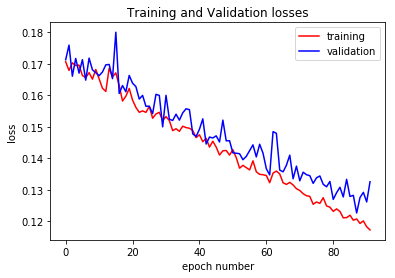

In [25]:
plt.plot(training_losses, 'r-', label='training')
plt.title('Training and Validation losses')
plt.ylabel('loss')
plt.plot(validation_losses, 'b-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.legend()
plt.show()

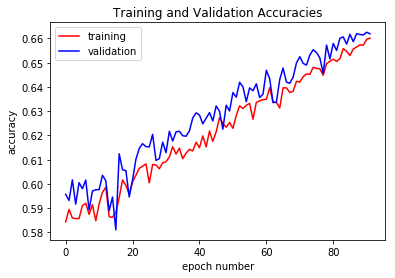

In [26]:
plt.plot(training_accuracy, 'r-', label='training')
plt.title('Training and Validation Accuracies')
plt.plot(validation_accuracy, 'b-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Varying Parameters for Dense GGNN
Now we experiment with changing both the graph edge drop-out probability and state drop-out probability. 

In [22]:
args = {
    '--help': None,
    '--config-file': None,
    '--config': '{"num_epochs": 1000, \
                "edge_weight_dropout_keep_prob": 0.5, \
                "graph_state_dropout_keep_prob": 0.5}',
    '--log_dir': None,
    '--data_dir': None,
    '--restore': None,
    '--freeze-graph-model': None,
    '--evaluate': None,
    '--data_dir': None
}


model = DenseGGNNChemModel(args)
model.train()

Run 2019-04-17-17-13-51_22499 starting with following parameters:
{"num_epochs": 100, "patience": 25, "learning_rate": 0.001, "clamp_gradient_norm": 1.0, "out_layer_dropout_keep_prob": 1.0, "hidden_size": 100, "num_timesteps": 4, "use_graph": true, "tie_fwd_bkwd": true, "task_ids": [0], "random_seed": 0, "train_file": "molecules_train.json", "valid_file": "molecules_valid.json", "batch_size": 256, "graph_state_dropout_keep_prob": 0.5, "task_sample_ratios": {}, "use_edge_bias": true, "edge_weight_dropout_keep_prob": 0.5}
Loading data from molecules_train.json
Loading data from molecules_valid.json
== Epoch 1


KeyboardInterrupt: 

In [ ]:
#Manual entry for log file:
desired_log = ""


# OPEN THE LOG FILE
# LOG FILE IS AN ARRAY OF DICTIONARIES
with open(model.log_file) as json_file:  
    data = json.load(json_file)
    
# with open(desired_log) as json_file:  
#    data = json.load(json_file)
   

training_losses = []
validation_losses = []
training_accuracy = []
validation_accuracy = []
for epoch in data:
    training_losses.append(epoch['train_results'][0])
    validation_losses.append(epoch['valid_results'][0])
    training_accuracy.append(1 - epoch['train_results'][1][0])
    validation_accuracy.append(1 - epoch['valid_results'][1][0])

In [0]:
plt.plot(training_losses, 'b-', label='training')
plt.title('Taining and Validation losses')
plt.ylabel('loss')
plt.plot(validation_losses, 'r-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
plt.plot(training_accuracy, 'r-', label='training')
plt.title('Taining and Validation Accuracis')
plt.plot(validation_accuracy, 'b-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Varying Parameters for Dense GGNN
Now we train the Dense GGNN with a RelU activation layer instead of a TanH activation layer

In [0]:
args = {
    '--help': None,
    '--config-file': None,
    '--config': '{"num_epochs": 1000, \
                "graph_rnn_activation": "relu"}',
    '--log_dir': None,
    '--data_dir': None,
    '--restore': None,
    '--freeze-graph-model': None,
    '--evaluate': None,
    '--data_dir': None
}


model = DenseGGNNChemModel(args)
model.train()

In [0]:
#Manual entry for log file:
desired_log = ""


# OPEN THE LOG FILE
# LOG FILE IS AN ARRAY OF DICTIONARIES
with open(model.log_file) as json_file:  
    data = json.load(json_file)
    
# with open(desired_log) as json_file:  
#    data = json.load(json_file)
   
    
# GET THE LOSS FROM EVERY EPOCH
training_losses = []
validation_losses = []
training_accuracy = []
validation_accuracy = []
for epoch in data:
    training_losses.append(epoch['train_results'][0])
    validation_losses.append(epoch['valid_results'][0])
    training_accuracy.append(1 - epoch['train_results'][1][0])
    validation_accuracy.append(1 - epoch['valid_results'][1][0])

In [0]:
plt.plot(training_losses, 'b-', label='training')
plt.title('Taining and Validation losses')
plt.ylabel('loss')
plt.plot(validation_losses, 'r-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
plt.plot(training_accuracy, 'r-', label='training')
plt.title('Taining and Validation Accuracis')
plt.plot(validation_accuracy, 'b-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend()
plt.show()

We now maintain the default TanH activation layer and attempt to change the dropout probabilities. 

In [0]:
args = {
    '--help': None,
    '--config-file': None,
    '--config': '{"num_epochs": 1000, \
                "graph_state_dropout_keep_prob": 0.5, \
                "edge_weight_dropout_keep_prob": 0.5}',
    '--log_dir': None,
    '--data_dir': None,
    '--restore': None,
    '--freeze-graph-model': None,
    '--evaluate': None,
    '--data_dir': None
}


model = DenseGGNNChemModel(args)
model.train()

In [0]:
#Manual entry for log file:
desired_log = ""


# OPEN THE LOG FILE
# LOG FILE IS AN ARRAY OF DICTIONARIES
with open(model.log_file) as json_file:  
    data = json.load(json_file)
    
# with open(desired_log) as json_file:  
#    data = json.load(json_file)
   
    
# GET THE LOSS FROM EVERY EPOCH
training_losses = []
validation_losses = []
training_accuracy = []
validation_accuracy = []
for epoch in data:
    training_losses.append(epoch['train_results'][0])
    validation_losses.append(epoch['valid_results'][0])
    training_accuracy.append(1 - epoch['train_results'][1][0])
    validation_accuracy.append(1 - epoch['valid_results'][1][0])

In [0]:
plt.plot(training_losses, 'b-', label='training')
plt.title('Taining and Validation losses')
plt.ylabel('loss')
plt.plot(validation_losses, 'r-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
plt.plot(training_accuracy, 'r-', label='training')
plt.title('Taining and Validation Accuracis')
plt.plot(validation_accuracy, 'b-',label='validation')
plt.xlabel('epoch number')
plt.ylabel('accuracy')
plt.legend()
plt.show()